In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error

In [2]:
dataset = pd.read_csv('./data/[1m]BTCUSDT.csv')

In [3]:
dataset['Start'] = pd.to_datetime(dataset["Start"].to_numpy(), unit='ms')
dataset['Stop'] = pd.to_datetime(dataset["Stop"].to_numpy(), unit='ms')

In [4]:
display(dataset)

,Start,Stop,Open,Close,Low,High,Volume
0,2017-08-17 04:00:00,2017-08-17 04:00:59.999,4261.48,4261.48,4261.48,4261.48,1.775183
1,2017-08-17 04:01:00,2017-08-17 04:01:59.999,4261.48,4261.48,4261.48,4261.48,0.000000
2,2017-08-17 04:02:00,2017-08-17 04:02:59.999,4280.56,4280.56,4280.56,4280.56,0.261074
3,2017-08-17 04:03:00,2017-08-17 04:03:59.999,4261.48,4261.48,4261.48,4261.48,0.012008
4,2017-08-17 04:04:00,2017-08-17 04:04:59.999,4261.48,4261.48,4261.48,4261.48,0.140796
...,...,...,...,...,...,...,...
1767788,2020-12-31 23:56:00,2020-12-31 23:56:59.999,28978.91,28975.06,28969.99,28988.06,19.086172
1767789,2020-12-31 23:57:00,2020-12-31 23:57:59.999,28975.06,28975.03,28955.35,28981.41,21.327772
1767790,2020-12-31 23:58:00,2020-12-31 23:58:59.999,28975.03,28923.67,28923.15,28977.10,36.070975
1767791,2020-12-31 23:59:00,2020-12-31 23:59:59.999,28923.66,28923.63,28903.86,28952.28,51.895343


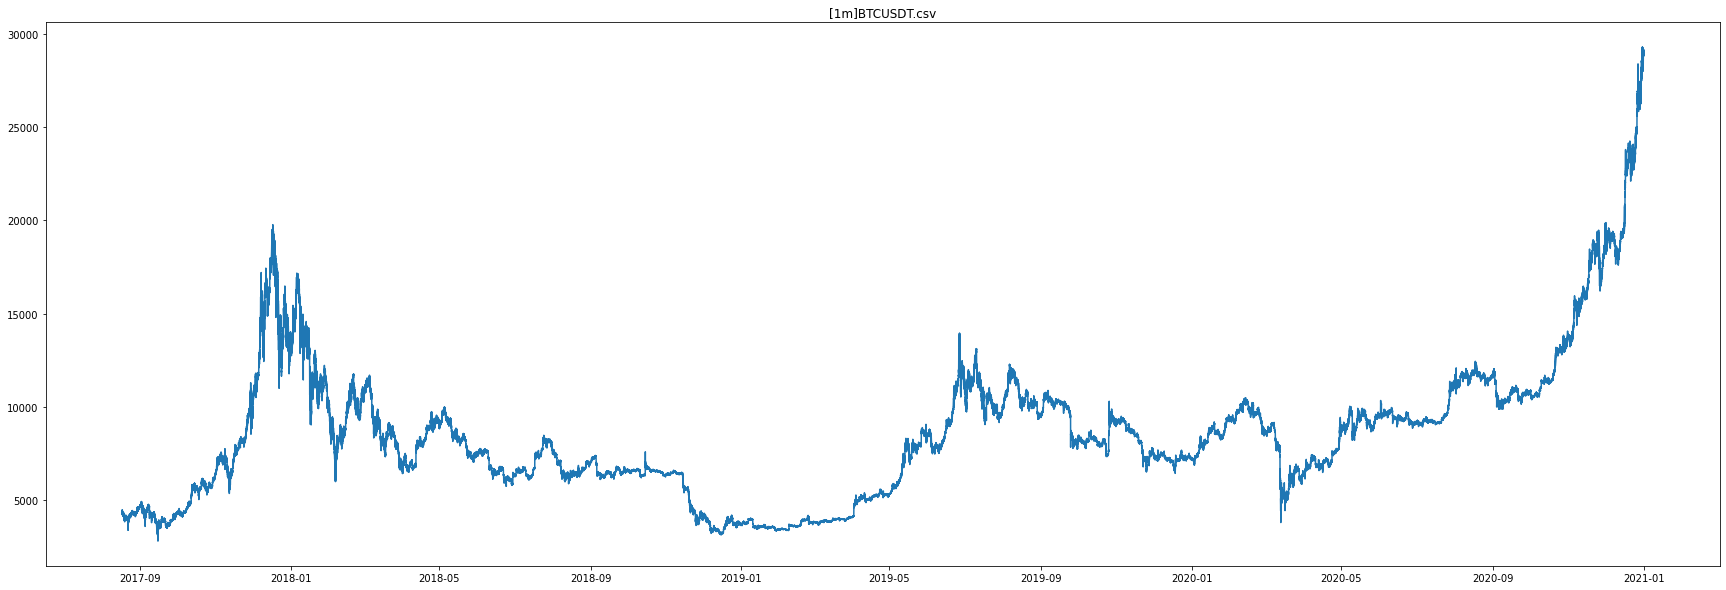

In [5]:
x_m = dataset['Stop']
y_m = dataset["Close"]
plt.figure(figsize=(30, 10))
plt.plot(x_m, y_m)
plt.title('[1m]BTCUSDT.csv')
plt.show()

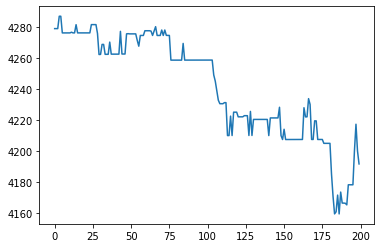

In [6]:
x = y_m[33400:33600].to_numpy()
plt.plot(x)

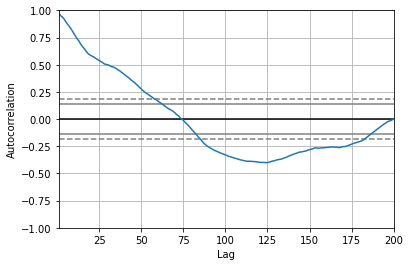

In [7]:
autocorrelation_plot(x)
plt.show()

> Autoregressive Moving Average (ARMA)

4210.594653390508 4214.05 3.455346609492153
4213.107610317957 4207.46 5.647610317956605
4209.685163967386 4207.47 2.215163967385706
4208.469000111881 4207.49 0.9790001118808505
4208.054088034814 4207.49 0.5640880348146311
4207.905948211542 4207.49 0.41594821154194506
4207.851497209693 4207.49 0.3614972096929705
4207.829442871716 4207.49 0.3394428717165283
4207.819179250356 4207.49 0.3291792503559918
4207.813038966452 4207.49 0.32303896645225905
4207.808324332788 4207.49 0.3183243327885066
4207.804326108171 4207.49 0.31432610817137174
4207.800588720026 4207.49 0.3105887200263169
4207.796991686796 4227.9 20.103008313203645
4221.172428633014 4222.0 0.8275713669863762
4221.97665024461 4222.04 0.06334975538993604
4222.250195442001 4233.74 11.489804557998468
4230.073603398129 4230.0 0.0736033981293076
4230.220328671072 4207.5 22.72032867107191
4215.904306305356 4207.49 8.414306305356149
4210.305777459866 4219.48 9.174222540133997
4216.666118951087 4219.44 2.773881048912699
4218.74369622686 4

c:\python\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


4176.773371820239 4159.65 17.1233718202393
4163.102261303012 4161.0 2.102261303011801
4161.700603905815 4171.73 10.029396094184449
4170.046517100654 4159.64 10.406517100653218
4162.191456219221 4173.68 11.488543780778855
4171.349520302901 4166.6 4.749520302900237
4168.017740930877 4166.6 1.4177409308767892
4167.230882466336 4166.5 0.7308824663359701
4166.961181565325 4165.46 1.5011815653251688
4166.100467156745 4178.37 12.269532843254638
4175.731922898058 4178.37 2.6380771019421445
4178.089338348044 4178.37 0.28066165195559734
4178.6266530380135 4178.37 0.25665303801361006
4178.749872889496 4200.12 21.370127110503745
4195.582114246729 4217.29 21.707885753270602
4214.432416025289 4200.12 14.312416025289167
4203.285741222633 4191.78 11.505741222633333


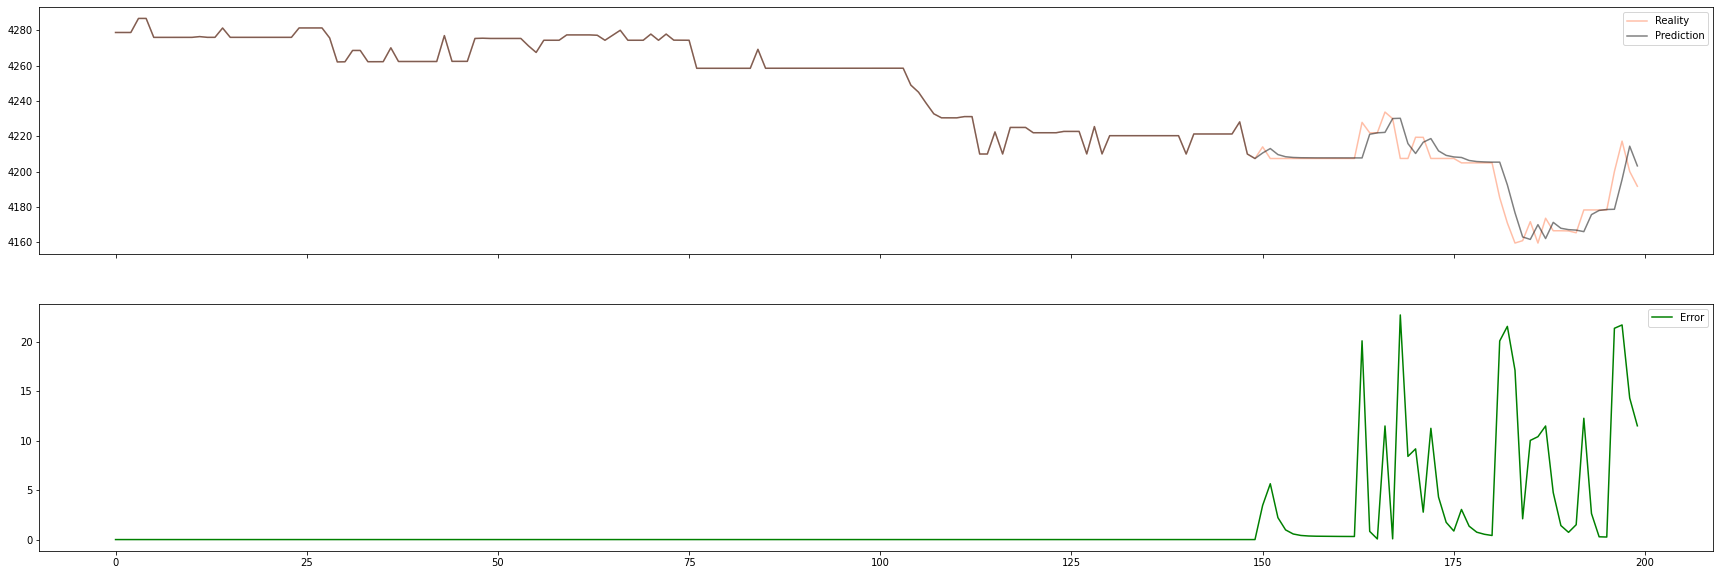

In [8]:
from statsmodels.tsa.arima.model import ARIMA

size = len(x) - 50
train, test = x[0:size], x[size:len(x)]

history = train.tolist()
predictions = train.tolist()
errors = [0] * len(history)

for i in range(len(test)):
    model = ARIMA(history, order=(1,0,1))
    model_fit = model.fit()
    
    predict = model_fit.forecast()[0]
    predictions.append(predict)
    
    true = test[i]
    history.append(true)
    
    err = np.abs(true - predict)
    errors.append(err)
    
    print(predict, true, err)
    
# evaluate forecasts
def measure_rmse(history, predictions):
    rmse = np.sqrt(mean_squared_error(history, predictions))
    return rmse

fig, (x_1, x_2) = plt.subplots(2, 1, figsize=(30, 10), sharex=True)

x_1.plot(history, color='coral', label='Reality', alpha=0.5)
x_1.plot(predictions, color='black', label='Prediction', alpha=0.5)
x_1.legend()

x_2.plot(errors, color='green', label='Error')
x_2.legend()

plt.show()

> Autoregressive Integrated Moving Average (ARIMA)

4210.222073695206 4214.05 3.827926304794346
4212.773565654881 4207.46 5.313565654881131
4209.375878913916 4207.47 1.9058789139153305
4208.091038066659 4207.49 0.6010380666593846
4207.684306418512 4207.49 0.19430641851249675
4207.553219778085 4207.49 0.06321977808511292
4207.510606658957 4207.49 0.020606658957149193
4207.496720227751 4207.49 0.006720227751429775
4207.49219194454 4207.49 0.002191944539845281
4207.490715014953 4207.49 0.0007150149531298666
4207.490233256879 4207.49 0.0002332568792553502
4207.490076100465 4207.49 7.610046486661304e-05
4207.490024829775 4207.49 2.4829775611578953e-05
4207.490008101973 4227.9 20.40999189802642
4220.529511464178 4222.0 1.4704885358223692
4221.737220083562 4222.04 0.30277991643833957
4221.948623452361 4233.74 11.79137654763872
4229.6042844408275 4230.0 0.3957155591724586
4230.141329562874 4207.5 22.64132956287358
4215.283350562551 4207.49 7.793350562551495
4210.552213873534 4219.48 8.927786126465435
4217.195874731441 4219.44 2.2441252685584914

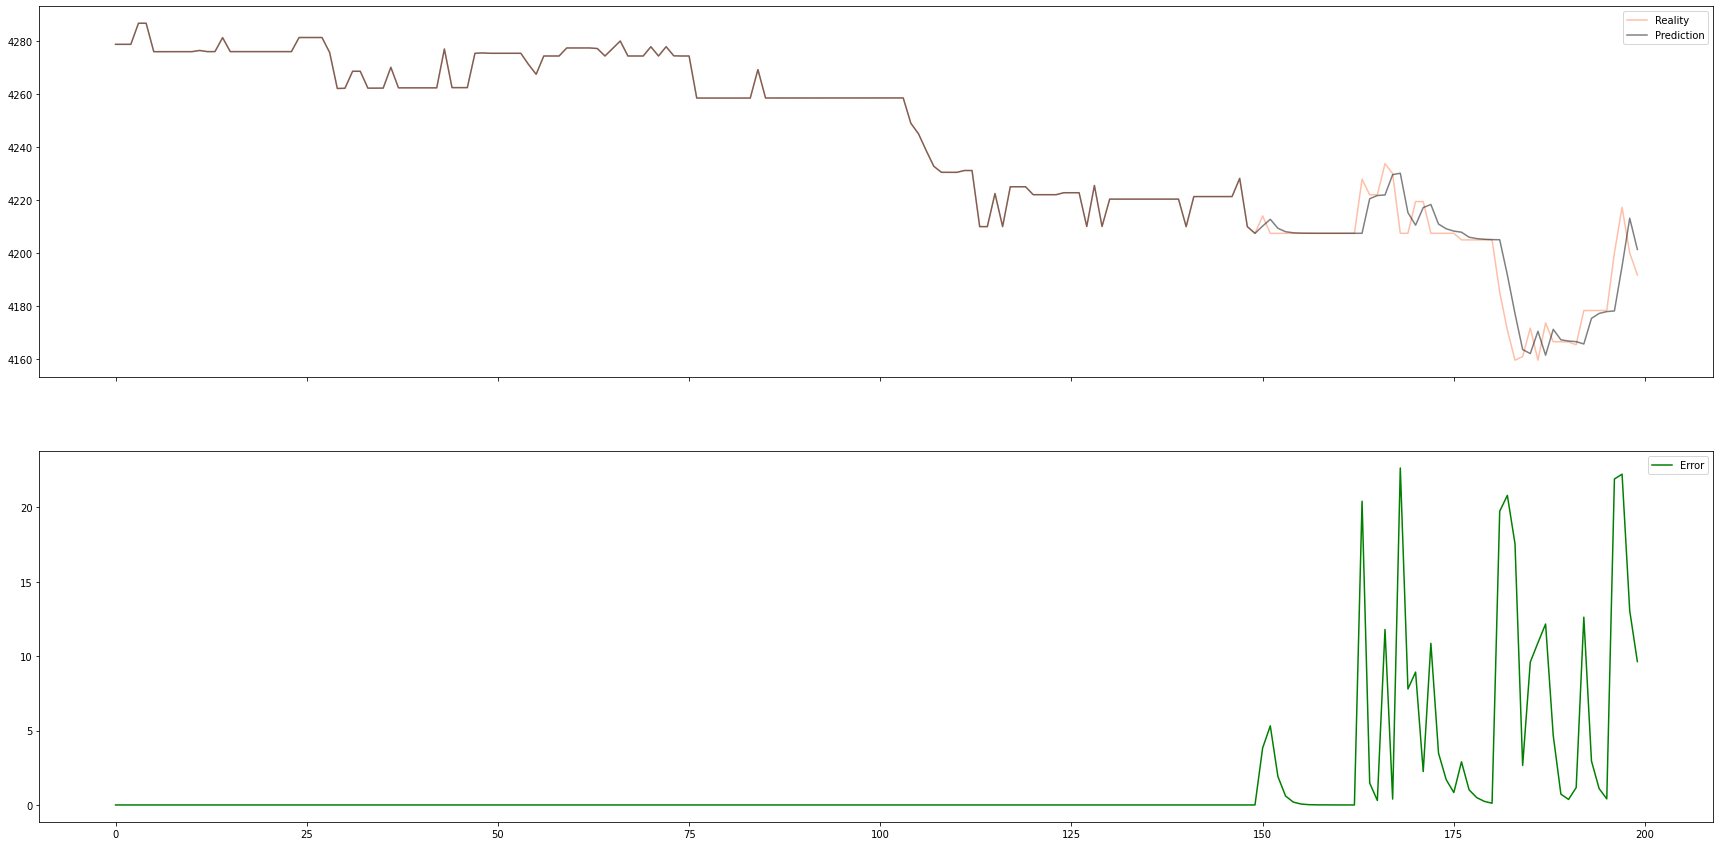

In [9]:
from statsmodels.tsa.arima.model import ARIMA

size = len(x) - 50
train, test = x[0:size], x[size:len(x)]

history = train.tolist()
predictions = train.tolist()
errors = [0] * len(history)

for i in range(len(test)):
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit()
    
    predict = model_fit.forecast()[0]
    predictions.append(predict)
    
    true = test[i]
    history.append(true)
    
    err = np.abs(true - predict)
    errors.append(err)
    
    print(predict, true, err)
    
# evaluate forecasts
def measure_rmse(history, predictions):
    rmse = np.sqrt(mean_squared_error(history, predictions))
    return rmse

fig, (x_1, x_2) = plt.subplots(2, 1, figsize=(30,15), sharex=True)

x_1.plot(history, color='coral', label='Reality', alpha=0.5)
x_1.plot(predictions, color='black', label='Prediction', alpha=0.5)
x_1.legend()

x_2.plot(errors, color='green', label='Error')
x_2.legend()

plt.show()

> Seasonal Autoregressive Integrated Moving-Average (SARIMA)

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

size = len(x) - 50
train, test = x[0:size], x[size:len(x)]

history = train.tolist()
predictions = train.tolist()
errors = [0] * len(history)

for i in range(len(test)):
    model = SARIMAX(y_m, order=(1,1,1), seasonal_order=(1,0,1,12))
    model_fit = model.fit()
    
    predict = model_fit.forecast()[0]
    predictions.append(predict)
    
    true = test[i]
    history.append(true)
    
    err = np.abs(true - predict)
    errors.append(err)
    
    print(predict, true, err)
    
def measure_rmse(history, predictions):
    rmse = np.sqrt(mean_squared_error(history, predictions))
    return rmse

fig, (x_1, x_2) = plt.subplots(2, 1, figsize=(30,15), sharex=True)

x_1.plot(history, color='coral', label='Reality', alpha=0.5)
x_1.plot(predictions, color='black', label='Prediction', alpha=0.5)
x_1.legend()

x_2.plot(errors, color='green', label='Error')
x_2.legend()

plt.show()